In [31]:
import pandas as pd
from sklearn.linear_model import LogisticRegression,LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import gc
import os
import sys
%matplotlib inline

In [32]:
!wget https://www.dropbox.com/s/ncqb2ctkg7da11k/weather.csv

--2021-05-03 21:35:34--  https://www.dropbox.com/s/ncqb2ctkg7da11k/weather.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:601a:18::a27d:712
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/ncqb2ctkg7da11k/weather.csv [following]
--2021-05-03 21:35:34--  https://www.dropbox.com/s/raw/ncqb2ctkg7da11k/weather.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd139cf9e41cc1f6b14d131b624.dl.dropboxusercontent.com/cd/0/inline/BNwjrTSS2y8TTql57vH1ctTClHTTC960rkc4OKTJhk-aeBV6ydBkCgn2zU0a9xwTfzVslVx1_Xijm4izHn9wRQ_yEdGmFoWGEpd9FbCI81qCyog5M1ePXByPlnvOz9jtnUurVDMeMY7SoDy1vSq03Mmh/file# [following]
--2021-05-03 21:35:35--  https://ucd139cf9e41cc1f6b14d131b624.dl.dropboxusercontent.com/cd/0/inline/BNwjrTSS2y8TTql57vH1ctTClHTTC960rkc4OKTJhk-aeBV6ydBkCgn2zU0a9xwTfzVslVx1_Xijm4izHn9wRQ_yEdGmF

In [33]:
!wget https://www.dropbox.com/s/brixkogrmhan6ed/cab_rides.csv

--2021-05-03 21:35:36--  https://www.dropbox.com/s/brixkogrmhan6ed/cab_rides.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:601a:18::a27d:712
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/brixkogrmhan6ed/cab_rides.csv [following]
--2021-05-03 21:35:36--  https://www.dropbox.com/s/raw/brixkogrmhan6ed/cab_rides.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc1e24b5af176f27421ade79f191.dl.dropboxusercontent.com/cd/0/inline/BNyaAH_ycLHRm_GY_chG5OcdpIzYgU1p7hBJX8jS_MzbeYZoC3JTMrPXmKtDDH_aecWjwkPO-nE2GLLWYIWciL3Iab1KGO2M63bRUStgpAPgIPJ1PG1UJaTZ2jYxW7NbnzN_FUZpjeP01pWohtWwz0cP/file# [following]
--2021-05-03 21:35:36--  https://uc1e24b5af176f27421ade79f191.dl.dropboxusercontent.com/cd/0/inline/BNyaAH_ycLHRm_GY_chG5OcdpIzYgU1p7hBJX8jS_MzbeYZoC3JTMrPXmKtDDH_aecWjwkPO-nE2GLLWYIWciL3

In [34]:
# Memory saving function credit to https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024**2
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                #if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                #    df[col] = df[col].astype(np.float16)
                #el
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        #else:
            #df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB --> {:.2f} MB (Decreased by {:.1f}%)'.format(
        start_mem, end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [35]:
cab_data = pd.read_csv("/content/cab_rides.csv")
cab_data=reduce_mem_usage(cab_data)
weather_data = pd.read_csv("/content/weather.csv")
weather_data=reduce_mem_usage(weather_data)


Memory usage of dataframe is 52.88 MB --> 44.95 MB (Decreased by 15.0%)
Memory usage of dataframe is 0.38 MB --> 0.22 MB (Decreased by 43.7%)


In [36]:
cab_data

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL
...,...,...,...,...,...,...,...,...,...,...
693066,1.00,Uber,1543708385534,North End,West End,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL
693067,1.00,Uber,1543708385534,North End,West End,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX
693068,1.00,Uber,1543708385534,North End,West End,NaN,1.0,64d451d0-639f-47a4-9b7c-6fd92fbd264f,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
693069,1.00,Uber,1543708385534,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV


In [37]:
import datetime
cab_data['datetime']= pd.to_datetime(cab_data['time_stamp'])
cab_data
weather_data['date_time'] = pd.to_datetime(weather_data['time_stamp'])

In [38]:
cab_data.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'datetime'],
      dtype='object')

In [39]:
weather_data.columns

Index(['temp', 'location', 'clouds', 'pressure', 'rain', 'time_stamp',
       'humidity', 'wind', 'date_time'],
      dtype='object')

In [40]:
cab_data.shape

(693071, 11)

In [41]:
weather_data.shape

(6276, 9)

In [42]:
cab_data.describe()

,distance,time_stamp,price,surge_multiplier
count,693071.000000,6.930710e+05,637976.000000,693071.000000
mean,2.190057,1.544046e+12,16.543797,1.013870
std,1.138935,6.891925e+08,9.319172,0.091467
min,0.020000,1.543204e+12,2.500000,1.000000
25%,1.280000,1.543444e+12,9.000000,1.000000
50%,2.160000,1.543737e+12,13.500000,1.000000
75%,2.920000,1.544828e+12,22.500000,1.000000
max,7.860000,1.545161e+12,97.500000,3.000000


# DATA CLEANING  AND PREPROCCESSING

For data cleaning these were the steps that we followed:-<br>
1.We identified the null values in our dataset.<br>
2.We identified the count's of different features.<br>
3.We performed imputation of the null  price column using fare per pile.

In [46]:
cab_data.isnull().sum()

distance                0
cab_type                0
time_stamp              0
destination             0
source                  0
price               55095
surge_multiplier        0
id                      0
product_id              0
name                    0
datetime                0
dtype: int64

In [47]:
cab_data['cab_type'].value_counts()

Uber    385663
Lyft    307408
Name: cab_type, dtype: int64

In [48]:
cab_data['destination'].value_counts()

Financial District         58851
Theatre District           57798
Back Bay                   57780
Boston University          57764
Haymarket Square           57764
Fenway                     57757
North End                  57756
Northeastern University    57755
South Station              57749
West End                   57575
Beacon Hill                57403
North Station              57119
Name: destination, dtype: int64

In [49]:
cab_data['source'].value_counts()

Financial District         58857
Theatre District           57813
Back Bay                   57792
Boston University          57764
North End                  57763
Fenway                     57757
Northeastern University    57756
South Station              57750
Haymarket Square           57736
West End                   57562
Beacon Hill                57403
North Station              57118
Name: source, dtype: int64

In [50]:
cab_data['surge_multiplier'].value_counts()

1.00    672096
1.25     11085
1.50      5065
1.75      2420
2.00      2239
2.50       154
3.00        12
Name: surge_multiplier, dtype: int64

In [51]:
cab_data['name'].value_counts()

Black SUV       55096
UberXL          55096
WAV             55096
Taxi            55095
Black           55095
UberX           55094
UberPool        55091
Lux Black       51235
Lyft            51235
Lyft XL         51235
Lux Black XL    51235
Lux             51235
Shared          51233
Name: name, dtype: int64

We noticed that the time_stamp  attribute is not in a proper format so we converted it into a proper format.We also introduced a new attribute called fare_per_mile .This value was obtained by dividing the cab price and distance covered per ride.

In [52]:
import datetime
#convert 13digit time stamp to datetime format
cab_data['date_time']= pd.to_datetime(cab_data['time_stamp']/1000, unit='s')
cab_data['date']= cab_data['date_time'].dt.date
cab_data['day'] = cab_data.date_time.dt.dayofweek
cab_data['hour'] = cab_data.date_time.dt.hour
#extract hours only
cab_data['fare_per_mile']= round(cab_data.price/cab_data.distance,2)

In [53]:
#To check if cab data has changed.
cab_data.head(2)

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetime,date_time,date,day,hour,fare_per_mile
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,1970-01-01 00:25:44.952607890,2018-12-16 09:30:07.890000105,2018-12-16,6,9,11.36
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,1970-01-01 00:25:43.284023677,2018-11-27 02:00:23.677000046,2018-11-27,1,2,25.00


In [54]:
#After conversion to a new column time we can delete the exisitng column
del cab_data['time_stamp']

We are using an imputation technique to replace the missing price values.We noticed that the missing values in the dataset are that of the type Uber-Taxi.The rate per mile in Boston for an UBER of the type 'TAXI'is a constant.The rate doesnt change irespective of the surge or weather conditions.Hence by multiplying the fare per mile and distance traveled in an Uber taxi,we were able to obtain the missing price.

In [55]:
#Replacing null values.
cab_data['fare_per_mile']=cab_data['fare_per_mile'].astype(float)
cab_data['fare_per_mile'].fillna('2.8',inplace=True)
cab_data['price'] = cab_data['fare_per_mile']*cab_data['distance']

TypeError: ignored

In [56]:
#After replacement checking if the change is reflected in the dataset.
cab_data.price.isnull().sum()

55095

In [57]:
cab_data1 = cab_data.dropna()

In [58]:
cab_data1.price.isnull().sum()

0

# Visualizations for Data Preprocessing

Visualizations help us understand the dsitribution of the  data better.For this purpose we explored several graphs ranging from heatmaps to count plots and bar plots.

In [59]:
#Mentioning our graph sizes
from pylab import rcParams
rcParams['figure.figsize'] = 16,10

Text(0.5, 1.0, 'DATA SUMMARY')

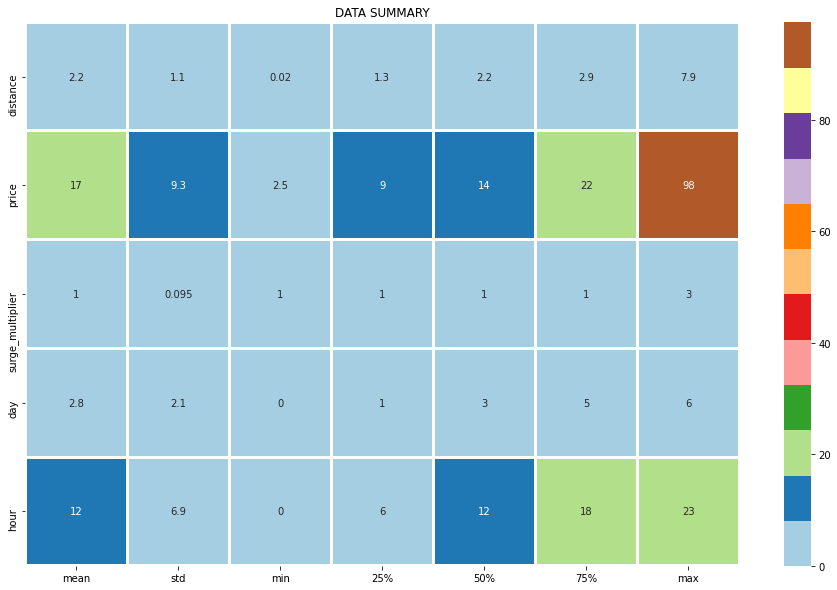

In [61]:
sns.heatmap(cab_data1.describe()[1:].transpose(),annot=True,linecolor='w',linewidth=2,cmap=sns.color_palette('Paired'))
plt.title("DATA SUMMARY")

Text(0.5, 1.0, 'CORRELATION BETWEEN VARIABLES')

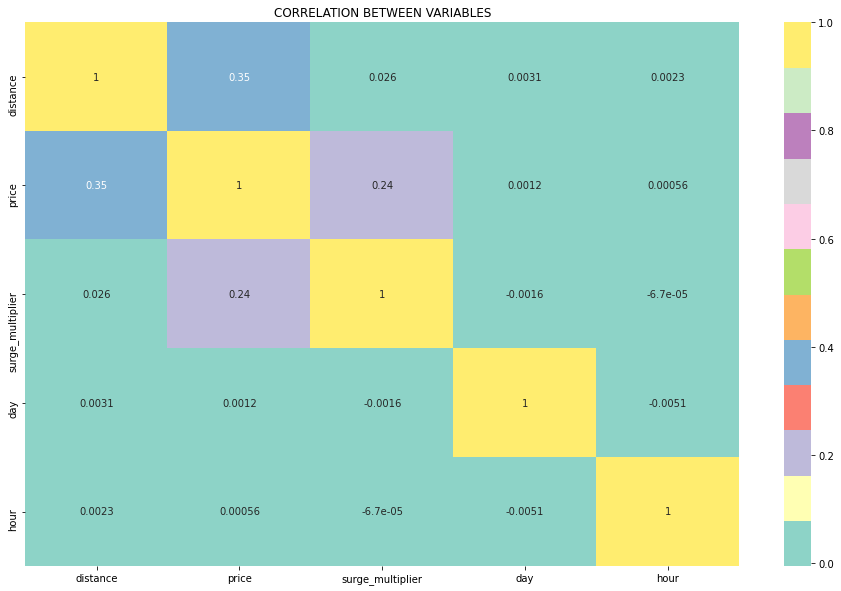

In [62]:
#Heatmap from searborn library
df_corr = cab_data1.corr()
sns.heatmap(df_corr, cmap =sns.color_palette("Set3"),annot = True)
plt.title("CORRELATION BETWEEN VARIABLES")

This heatmap gave us an idea of the highly correlated variables.We observe that apart from the variable fare_per_mile .Distance and price have postive correlation whereas surge_multiper has positive correlation with price and negatve correlation with distance.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


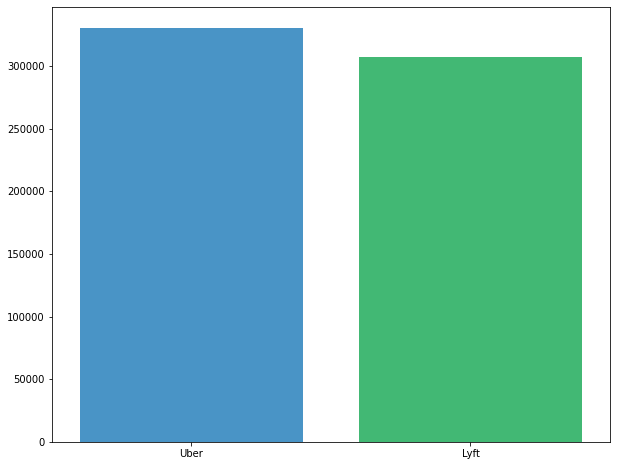

In [63]:
#Barplot  to display Uber Vs Lyft 

plt.figure(figsize=(10,8))
flatui = [ "#3498db", "#2ecc71"]
x=['Uber','Lyft']
y = [cab_data1.cab_type[(cab_data1.cab_type)=='Uber'].count(),cab_data1.cab_type[(cab_data1.cab_type)=='Lyft'].count()]
vis1= sns.barplot(x,y,palette=flatui)

# Data preparation for Data preprocessing

We wanted to answer certain questions such as How does weather effect the surge? Does  it solely depend on weather only? and 
How each weather attribute effects surge?.This is when we realised that to answer these questions we need to merge our existing cab_rides dataset with weather data for each day in Boston.We used the time_stamp attribute as the common attribute between the two datasets.<br>
<b>NOTE:- </b><I>We use date to join both our data sets.As weather is recorded for an average day.</I>

In [64]:
#Import the new dataset and view the attributes
df_weather=pd.read_csv('weather.csv')
df_weather.head(2)

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32


In [65]:
df_weather['rain'].fillna(0, inplace = True)

In [66]:
#Splitting the time_stamp attribute in weather to two attributes which are time and data
df_weather['date_time'] = pd.to_datetime(df_weather['time_stamp'], unit='s')
del df_weather['time_stamp']

#df_weather['date_time']

In [68]:
#merge the datasets to refelect same time for a location
cab_data1['merge_date'] = cab_data1.source.astype(str) +" - "+ cab_data1.date_time.dt.date.astype("str") +" - "+ cab_data1.date_time.dt.hour.astype("str")
df_weather['merge_date'] = df_weather.location.astype(str) +" - "+ df_weather.date_time.dt.date.astype("str") +" - "+ df_weather.date_time.dt.hour.astype("str")
print(cab_data1.head(2))
print(df_weather.head(2))

   distance cab_type  ... fare_per_mile                         merge_date
0      0.44     Lyft  ...         11.36  Haymarket Square - 2018-12-16 - 9
1      0.44     Lyft  ...            25  Haymarket Square - 2018-11-27 - 2

[2 rows x 16 columns]
    temp     location  ...           date_time                     merge_date
0  42.42     Back Bay  ... 2018-12-16 23:45:01     Back Bay - 2018-12-16 - 23
1  42.43  Beacon Hill  ... 2018-12-16 23:45:01  Beacon Hill - 2018-12-16 - 23

[2 rows x 9 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [69]:
df_weather = df_weather.groupby(['merge_date']).mean()
df_weather.reset_index(inplace=True)
df_weather.head()

,merge_date,temp,clouds,pressure,rain,humidity,wind
0,Back Bay - 2018-11-26 - 10,40.695,0.995,1014.800,0.0000,0.940,1.895
1,Back Bay - 2018-11-26 - 11,40.185,0.955,1015.305,0.0000,0.940,2.260
2,Back Bay - 2018-11-26 - 12,40.315,0.920,1015.275,0.0000,0.935,2.940
3,Back Bay - 2018-11-26 - 13,41.950,0.910,1015.200,0.0031,0.910,3.545
4,Back Bay - 2018-11-26 - 14,42.765,0.905,1014.695,0.0044,0.910,2.960


In [71]:
#Merging based on the date and location.
df_merged = pd.merge(cab_data1, df_weather, on='merge_date')
print(df_merged.shape)

(635242, 22)


In our newly formed merged dataset we perform info(),describe() and shape(),columns to understand the data.

In [72]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 635242 entries, 0 to 635241
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   distance          635242 non-null  float32       
 1   cab_type          635242 non-null  object        
 2   destination       635242 non-null  object        
 3   source            635242 non-null  object        
 4   price             635242 non-null  float32       
 5   surge_multiplier  635242 non-null  float32       
 6   id                635242 non-null  object        
 7   product_id        635242 non-null  object        
 8   name              635242 non-null  object        
 9   datetime          635242 non-null  datetime64[ns]
 10  date_time         635242 non-null  datetime64[ns]
 11  date              635242 non-null  object        
 12  day               635242 non-null  int64         
 13  hour              635242 non-null  int64         
 14  fare

In [73]:
df_merged.shape

(635242, 22)

In [74]:
print(df_merged.columns)

Index(['distance', 'cab_type', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'datetime', 'date_time',
       'date', 'day', 'hour', 'fare_per_mile', 'merge_date', 'temp', 'clouds',
       'pressure', 'rain', 'humidity', 'wind'],
      dtype='object')


## Visualization of merged dataset

We have several new attributes in our merged dataset .We want visualize how these attributes contribute to our existing features such as surge,price,location cab_type and weather attributes such as rain.For visualization we have employed several plots which are catplots,countplots,boxplots,distplot and violionplot. 

Text(0.5, 1.0, 'DATA SUMMARY')

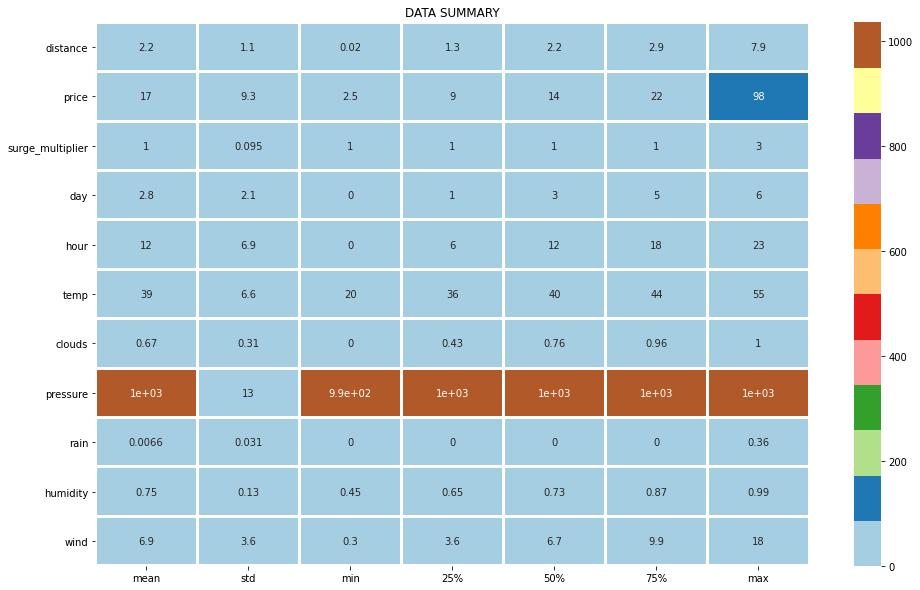

In [75]:
sns.heatmap(df_merged.describe()[1:].transpose(),annot=True,linecolor='w',linewidth=2,cmap=sns.color_palette('Paired'))
plt.title("DATA SUMMARY")

Text(0.5, 1.0, 'CORRELATION BETWEEN VARIABLES')

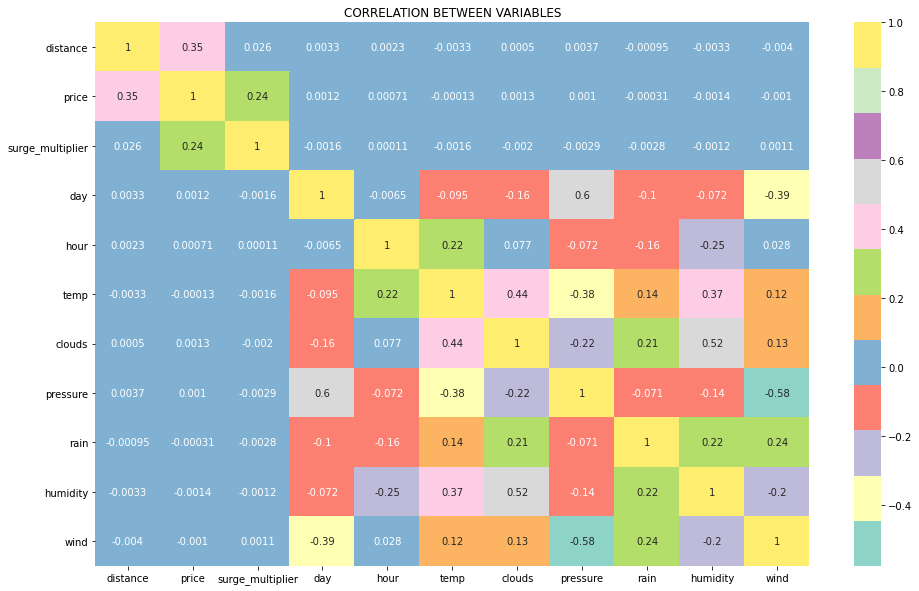

In [76]:
df_corr = df_merged.corr()
sns.heatmap(df_corr, cmap =sns.color_palette("Set3"),annot = True)
plt.title("CORRELATION BETWEEN VARIABLES")

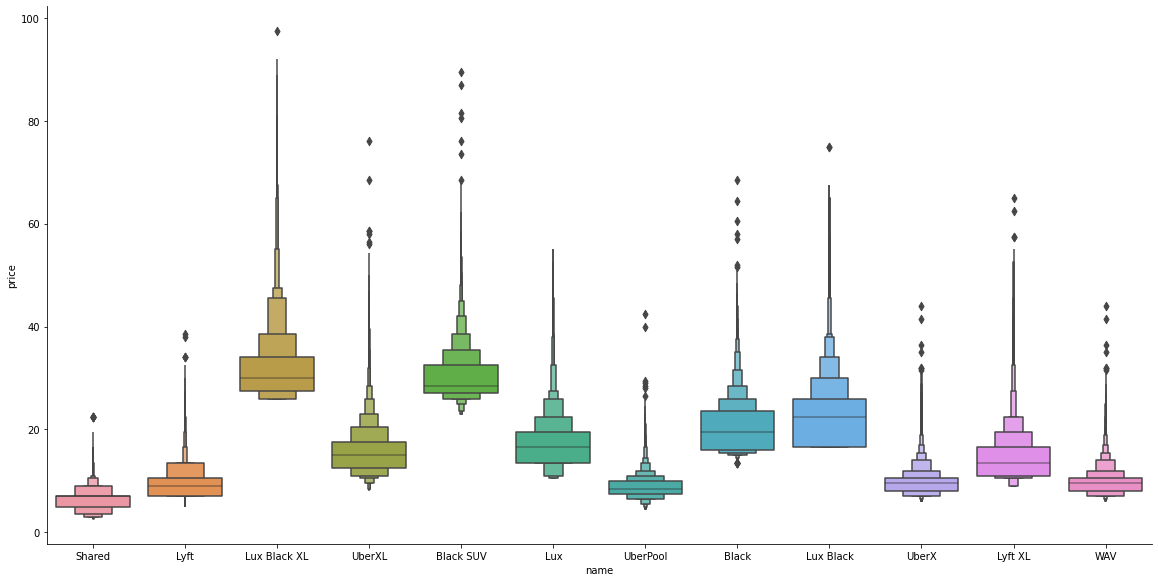

In [77]:
#Catplot
sns.catplot(x="name", y="price", data=df_merged,kind="boxen", height=8, aspect=2);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


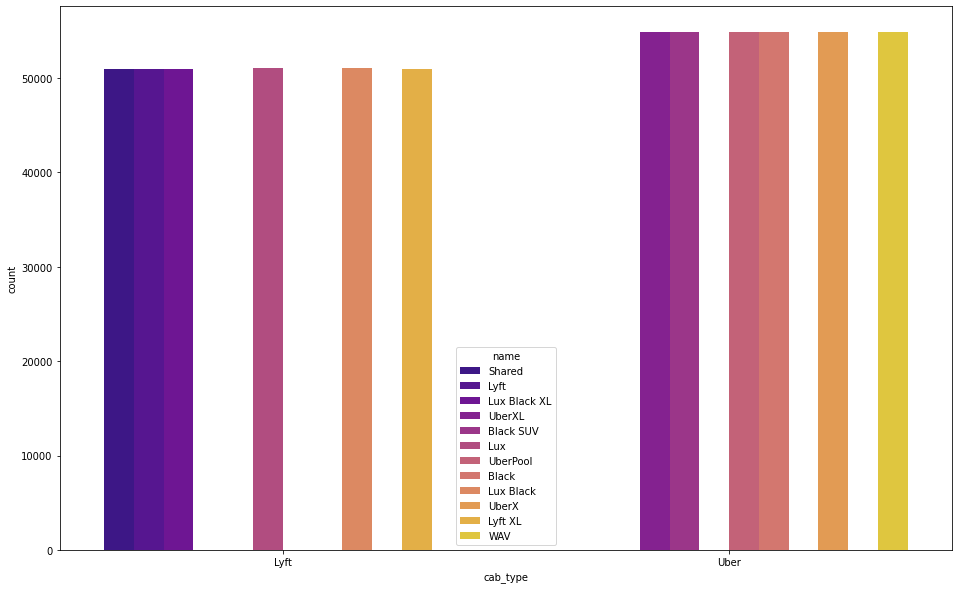

In [78]:
#Countplot
sns.countplot(df_merged['cab_type'],hue=df_merged['name'], palette='plasma')

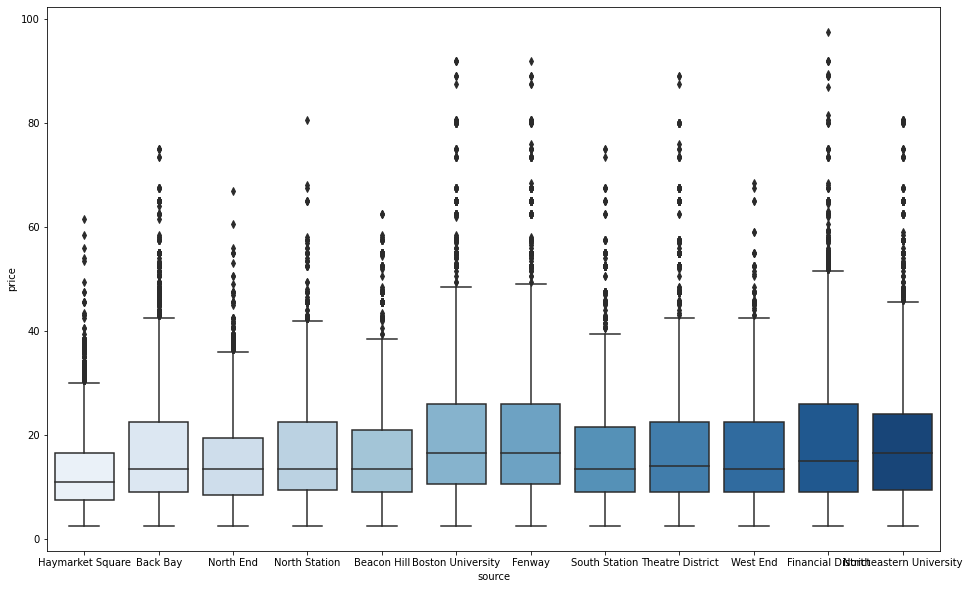

In [79]:
sns.boxplot(data=df_merged, x='source',y='price',palette='Blues')

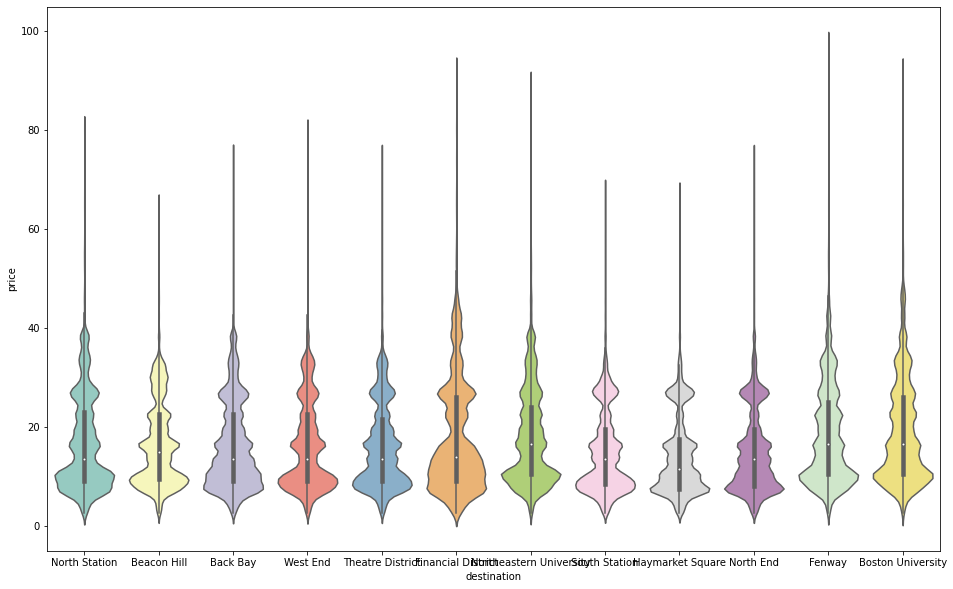

In [80]:
sns.violinplot(data=df_merged, x='destination', y='price',palette="Set3",scale="width")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


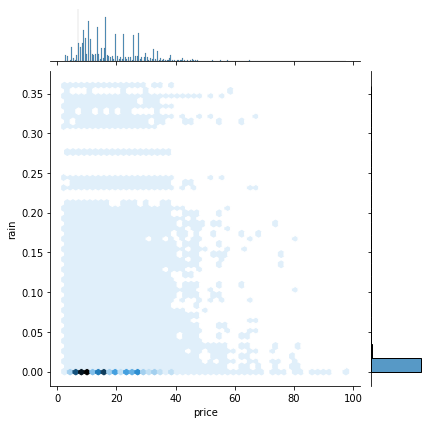

In [81]:
#Jointplot
sns.jointplot("price", "rain", data=df_merged, kind="hex",bins=15)

name
Black           AxesSubplot(0.125,0.125;0.775x0.755)
Black SUV       AxesSubplot(0.125,0.125;0.775x0.755)
Lux             AxesSubplot(0.125,0.125;0.775x0.755)
Lux Black       AxesSubplot(0.125,0.125;0.775x0.755)
Lux Black XL    AxesSubplot(0.125,0.125;0.775x0.755)
Lyft            AxesSubplot(0.125,0.125;0.775x0.755)
Lyft XL         AxesSubplot(0.125,0.125;0.775x0.755)
Shared          AxesSubplot(0.125,0.125;0.775x0.755)
UberPool        AxesSubplot(0.125,0.125;0.775x0.755)
UberX           AxesSubplot(0.125,0.125;0.775x0.755)
UberXL          AxesSubplot(0.125,0.125;0.775x0.755)
WAV             AxesSubplot(0.125,0.125;0.775x0.755)
Name: price, dtype: object

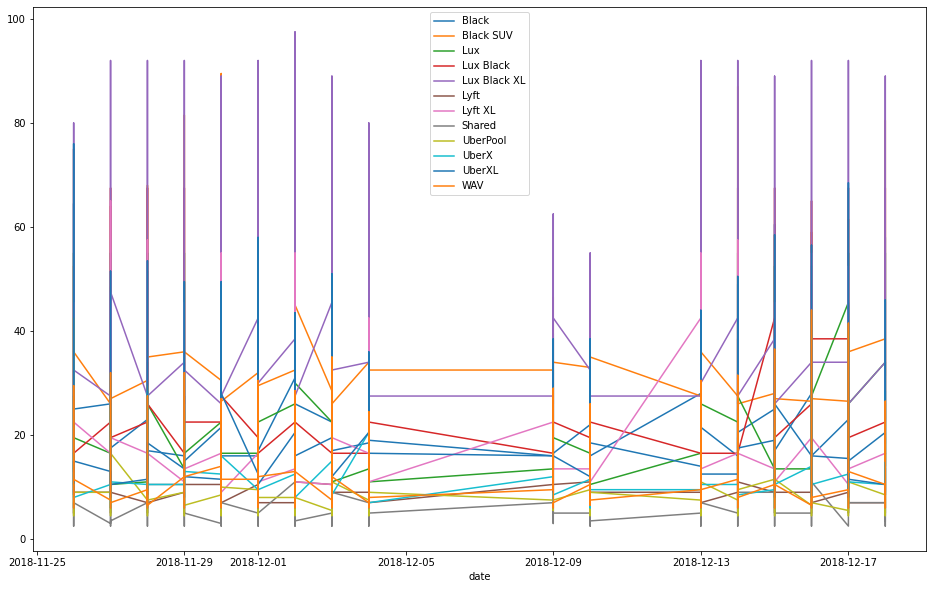

In [82]:
df_merged.set_index('date').groupby('name')['price'].plot(legend=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


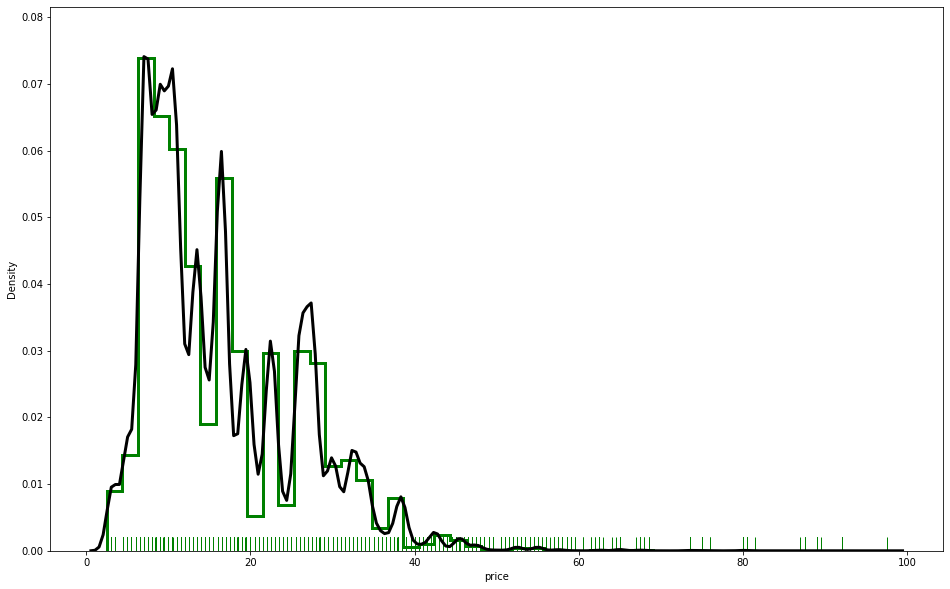

In [83]:
sns.distplot(df_merged.price, rug=True, rug_kws={"color": "g"},
                   kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                   hist_kws={"histtype": "step", "linewidth": 3,
                             "alpha": 1, "color": "g"})

## Splitting into uber and lyft

We have decided to split the dataset to uber and lyft  so that we can generate predictions seperately .Another reason for the split was to find interesting association rules among uber and lyft data seperately.

In [84]:
#Dropping certain columns as they are not neccessary for predictions
df_merged = df_merged.drop(['date_time','id','product_id'], axis=1)
f_merged = df_merged.drop(['fare_per_mile','surge_multiplier'],axis=1)
df_merged = df_merged.loc[:, df_merged.columns !='merge_date']

In [85]:
#Splitting the dataset
OverallData = df_merged.drop(['cab_type'],axis=1)
uber = df_merged[df_merged['cab_type']=='Uber']
uber.reset_index(inplace=True)
uber.drop('index', axis=1, inplace=True)
lyft = df_merged[df_merged['cab_type']=='Lyft']
lyft.reset_index(inplace=True)
lyft.drop('index', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [86]:
#Removing the cab type from uber and lyft
uber.drop('cab_type', axis=1, inplace=True)
lyft.drop('cab_type', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [87]:
#Overview of all the columns present
print(OverallData.columns)
print(uber.columns)
print(lyft.columns)

Index(['distance', 'destination', 'source', 'price', 'surge_multiplier',
       'name', 'datetime', 'date', 'day', 'hour', 'fare_per_mile', 'temp',
       'clouds', 'pressure', 'rain', 'humidity', 'wind'],
      dtype='object')
Index(['distance', 'destination', 'source', 'price', 'surge_multiplier',
       'name', 'datetime', 'date', 'day', 'hour', 'fare_per_mile', 'temp',
       'clouds', 'pressure', 'rain', 'humidity', 'wind'],
      dtype='object')
Index(['distance', 'destination', 'source', 'price', 'surge_multiplier',
       'name', 'datetime', 'date', 'day', 'hour', 'fare_per_mile', 'temp',
       'clouds', 'pressure', 'rain', 'humidity', 'wind'],
      dtype='object')


### Transformations in Data Preprocessing

In this specific stage we are getting our data ready inorder to apply machine learning models.We first need to split our data into train and test set so that we can apply changes to only the relevant features.Here price is the target variable and the other features excluding time are predictor variables.



In [88]:
Xd = OverallData.loc[:, OverallData.columns != 'price']
yd = OverallData['price']
Xd_train,Xd_test,yd_train,yd_test = train_test_split(Xd,yd,test_size = 0.33, random_state=42)

In [90]:
Xu = uber.loc[:, uber.columns != 'price']
yu = uber['price']
Xu_train,Xu_test,yu_train,yu_test = train_test_split(Xu,yu,test_size = 0.33, random_state=42)

In [91]:
Xl = lyft.loc[:, lyft.columns != 'price']
yl = lyft['price']
Xl_train,Xl_test,yl_train,yl_test = train_test_split(Xl,yl,test_size = 0.33, random_state=42)

In [103]:
weather_data.describe()

,temp,clouds,pressure,rain,time_stamp,humidity,wind
count,6276.000000,6276.000000,6276.000000,894.000000,6.276000e+03,6276.000000,6276.000000
mean,39.090378,0.677775,1008.443176,0.057652,1.543857e+09,0.763976,6.802810
std,6.022061,0.314283,12.870790,0.100758,6.659340e+05,0.127340,3.633476
min,19.620001,0.000000,988.250000,0.000200,1.543204e+09,0.450000,0.290000
25%,36.077501,0.440000,997.747498,0.004900,1.543387e+09,0.670000,3.517500
50%,40.130001,0.780000,1007.659973,0.014850,1.543514e+09,0.760000,6.570000
75%,42.832501,0.970000,1018.479980,0.060925,1.544691e+09,0.890000,9.920000
max,55.410000,1.000000,1035.119995,0.780700,1.545159e+09,0.990000,18.180000


In [104]:
a=pd.concat([cab_data,weather_data])

In [105]:
a['day']=a.date_time.dt.day
a['hour']=a.date_time.dt.hour

In [106]:
a.fillna(0,inplace=True)

In [107]:
a.columns

Index(['distance', 'cab_type', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'datetime', 'date_time',
       'date', 'day', 'hour', 'fare_per_mile', 'temp', 'location', 'clouds',
       'pressure', 'rain', 'time_stamp', 'humidity', 'wind'],
      dtype='object')

In [108]:
a.groupby('cab_type').count()

,distance,destination,source,price,surge_multiplier,id,product_id,name,datetime,date_time,date,day,hour,fare_per_mile,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
cab_type,,,,,,,,,,,,,,,,,,,,,,
0,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276
Lyft,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408
Uber,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663


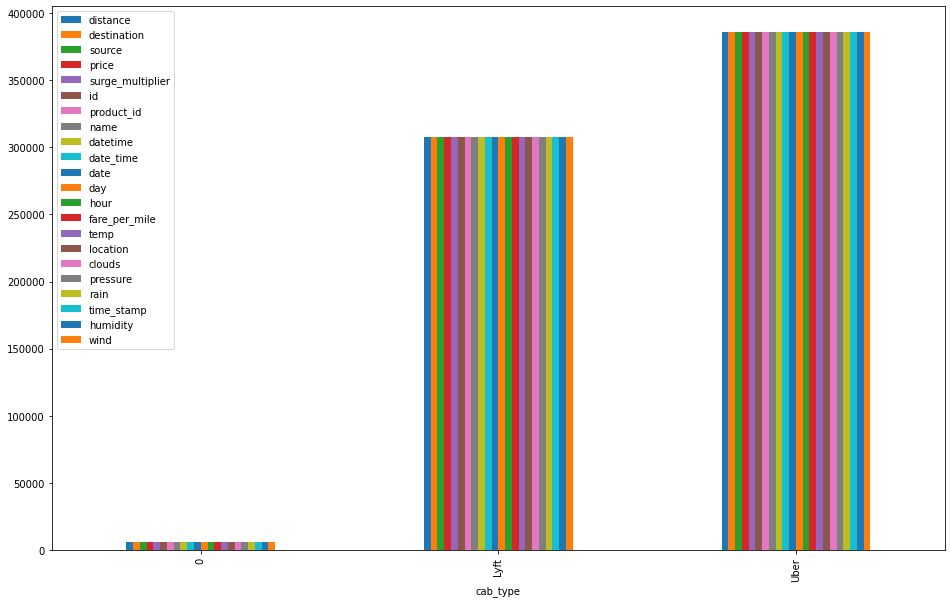

In [109]:
a.groupby('cab_type').count().plot.bar()


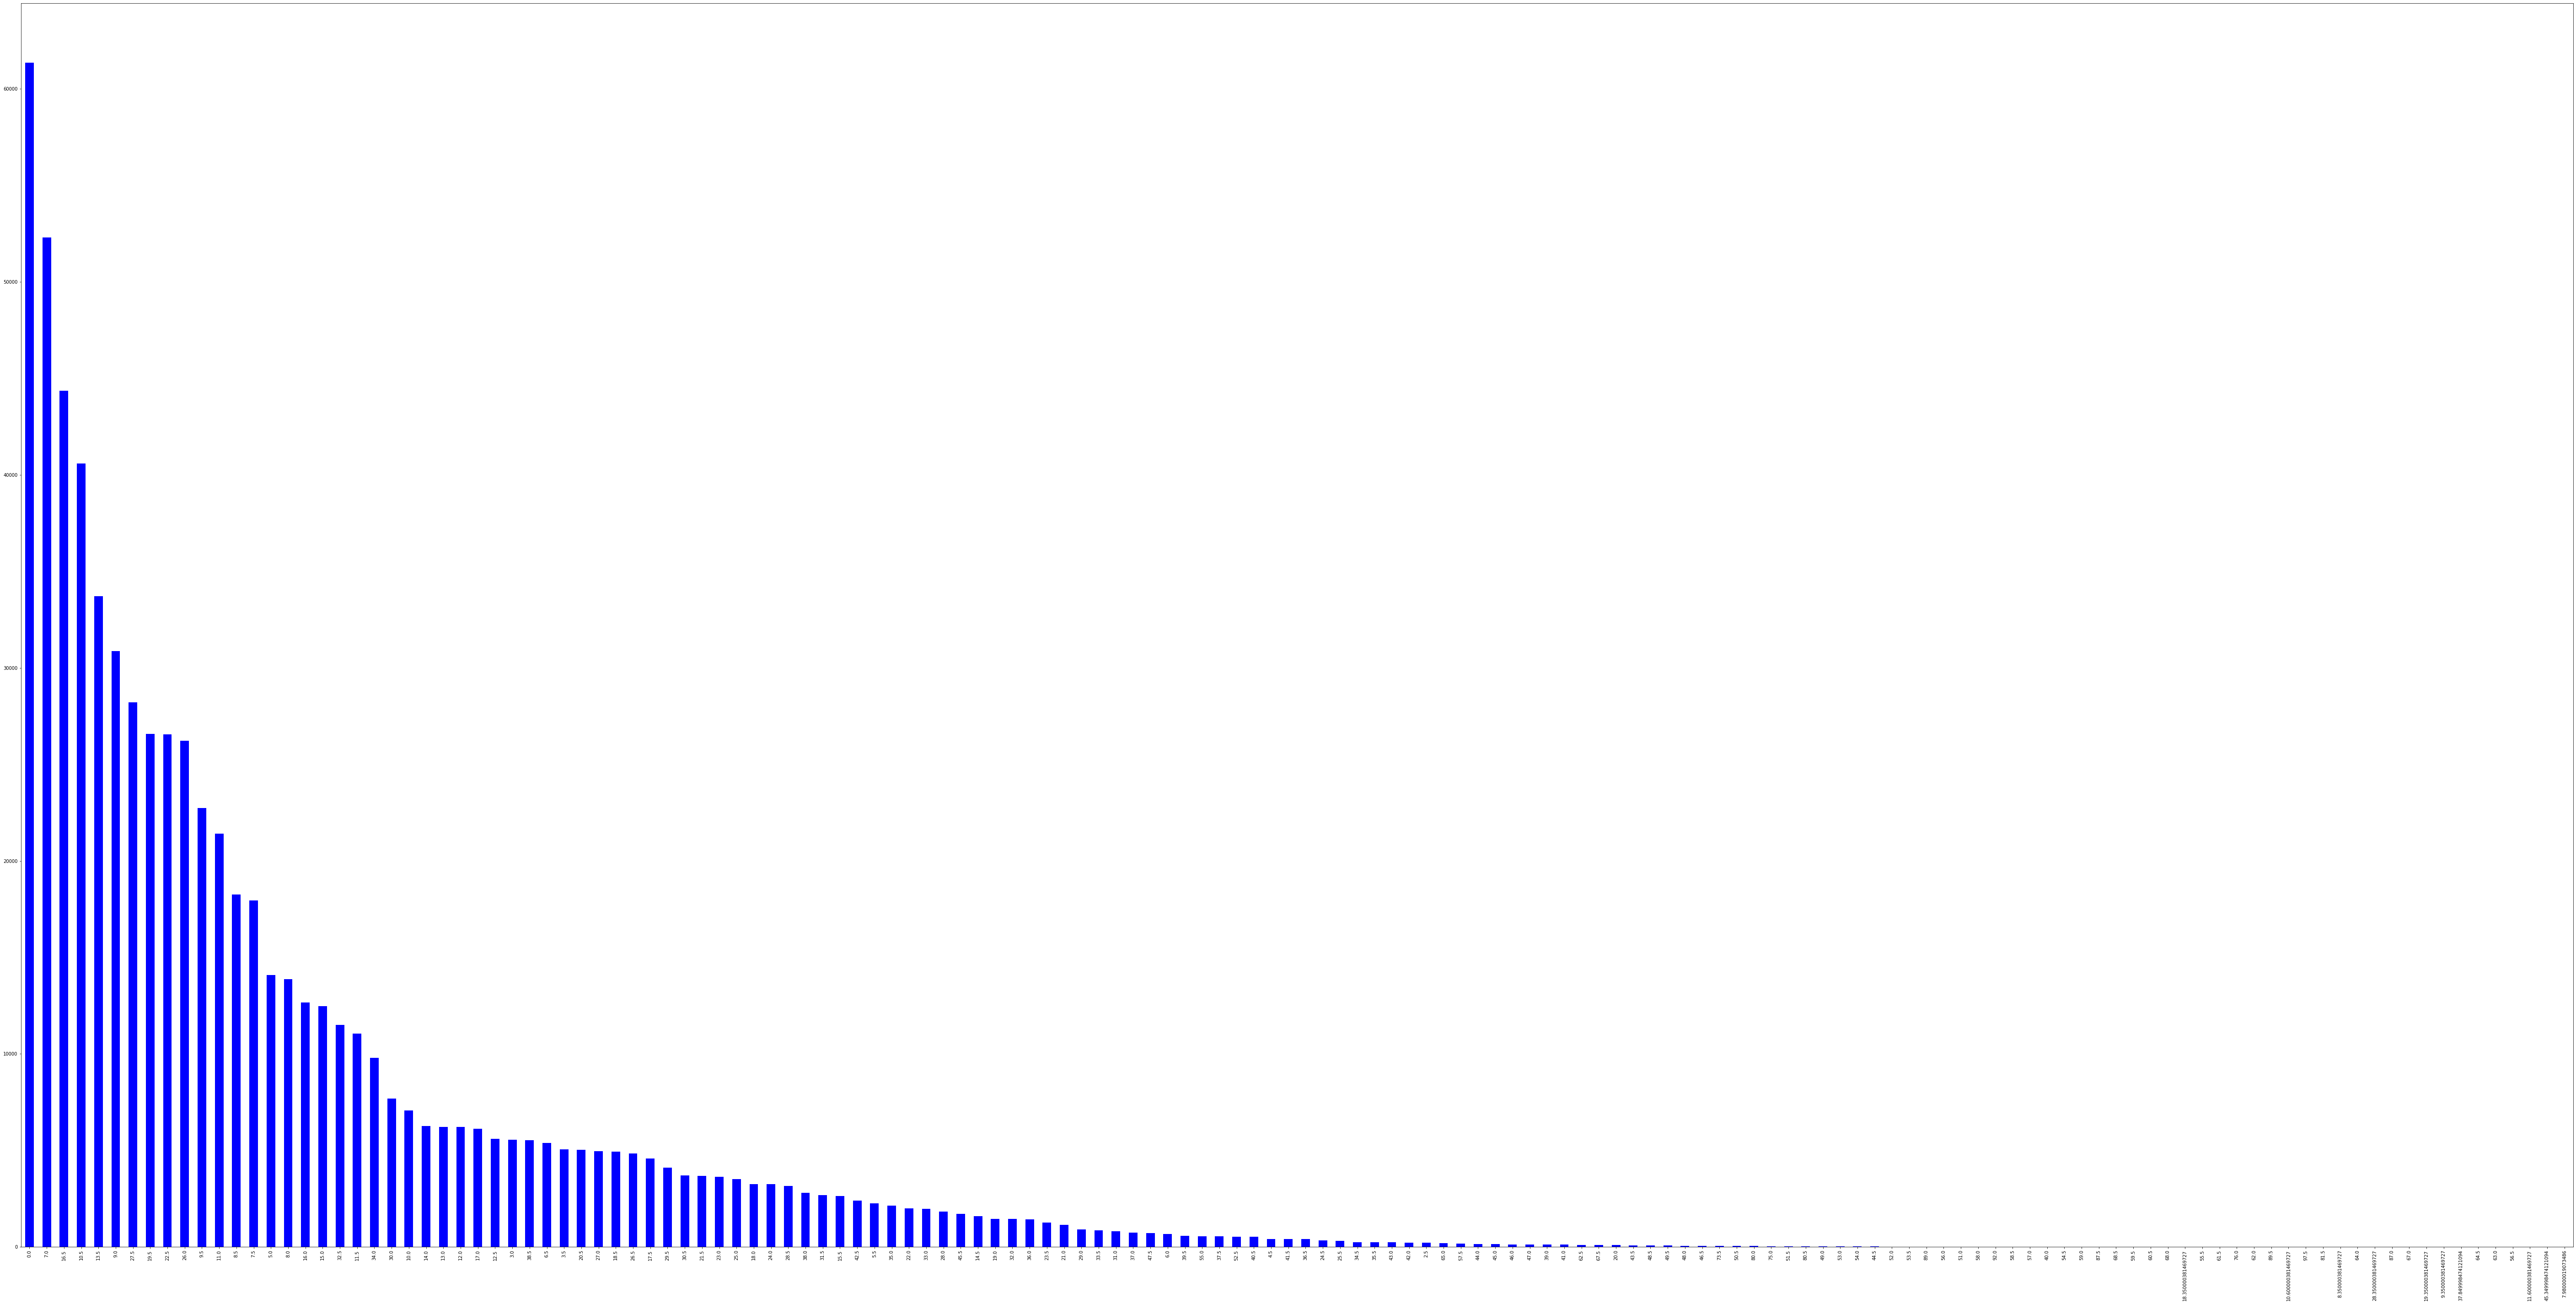

In [110]:
a['price'].value_counts().plot(kind='bar',figsize=(100,50),color='blue')


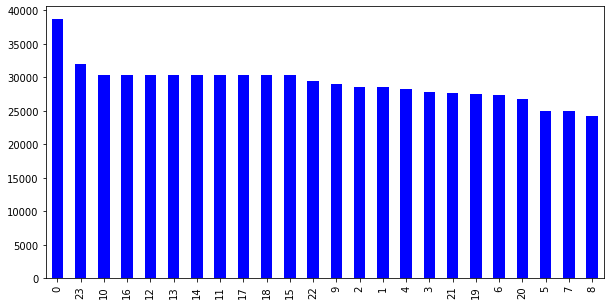

In [111]:
a['hour'].value_counts().plot(kind='bar',figsize=(10,5),color='blue')


In [112]:
import matplotlib.pyplot as plt
x=a['hour']
y=a['price']
plt.plot(x,y)
plt.show()


OverflowError: ignored

<Figure size 1152x720 with 1 Axes>

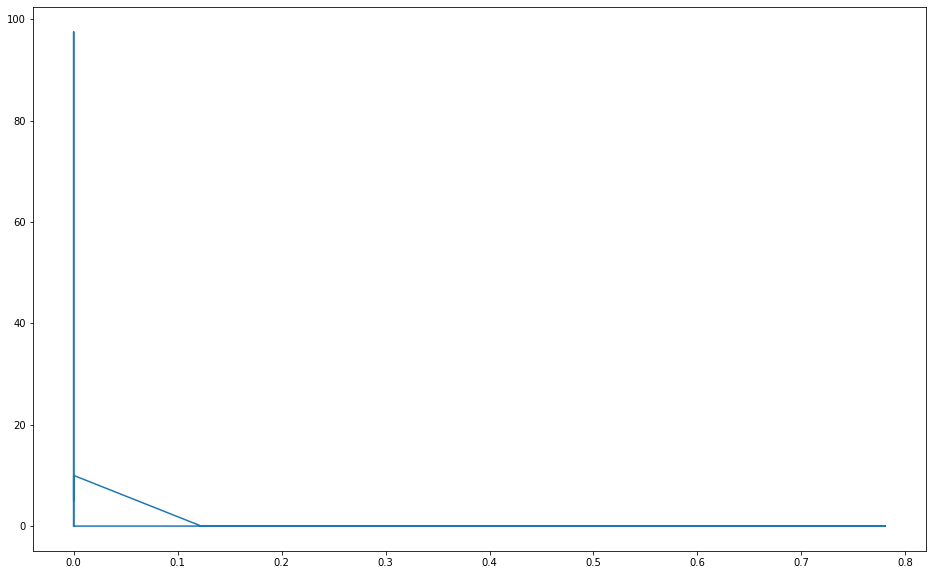

In [113]:
x=a['rain']
y=a['price']
plt.plot(x,y)
plt.show()

In [114]:
a.columns

Index(['distance', 'cab_type', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'datetime', 'date_time',
       'date', 'day', 'hour', 'fare_per_mile', 'temp', 'location', 'clouds',
       'pressure', 'rain', 'time_stamp', 'humidity', 'wind'],
      dtype='object')

In [115]:
x1=a[['distance', 'temp','clouds', 'pressure', 'humidity','wind','rain','day','hour','surge_multiplier','clouds']]
y1=a['price']

In [116]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
x_train, y_train, x_test, y_test = train_test_split(x1, y1, test_size = 0.25, random_state = 42)

In [117]:
linear=LinearRegression()
linear.fit(x_train,x_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [118]:
predictions=linear.predict(y_train)

In [119]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
df

,Actual,Predicted
81607,42.5,32.545311
354,0.0,14.761332
471801,32.5,16.815487
407645,27.5,10.473440
474760,27.5,10.565902
...,...,...
538489,7.5,10.709906
579511,13.5,15.517593
5421,9.0,11.824248
279982,8.0,11.866236


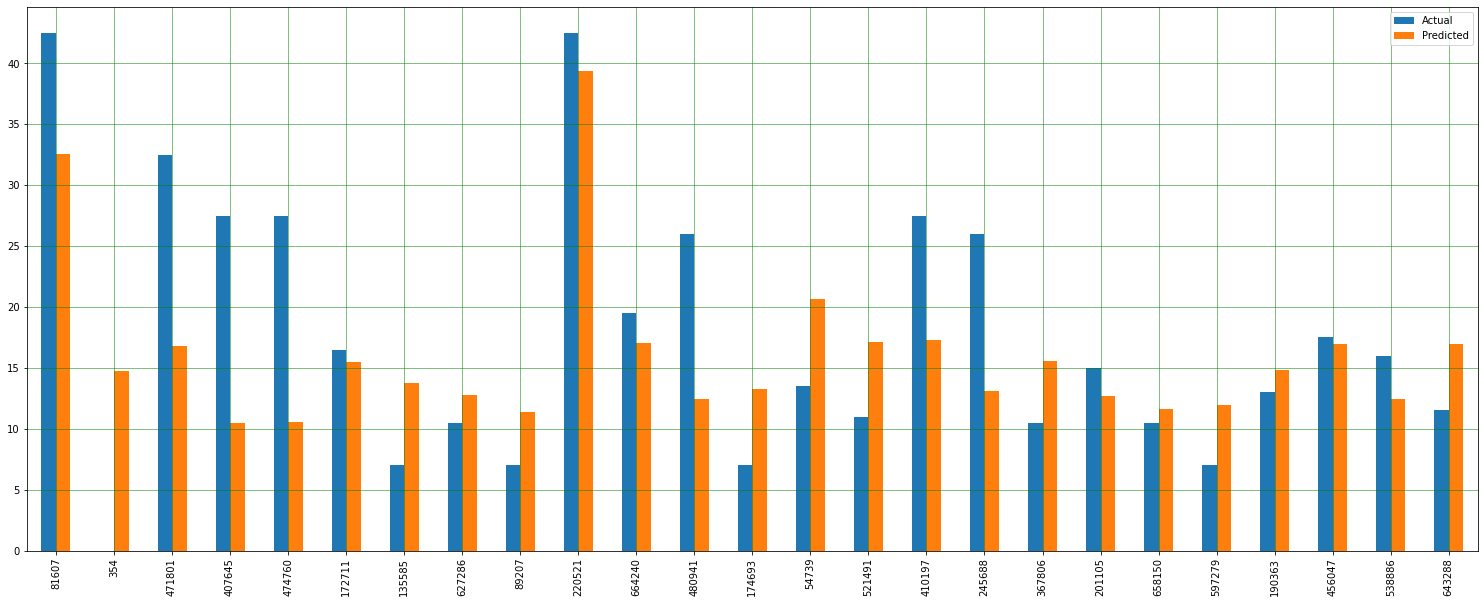

In [120]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(26,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()